In [4]:
import pandas as pd
import graphviz
import dtreeviz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [5]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import BayesianRidge
from sklearn import tree
from sklearn.linear_model import ridge_regression
from scipy.special import binom
from scipy.stats import chi2_contingency, mannwhitneyu, norm, t, ttest_ind

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

In [6]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['0', '1', '2']); ax.yaxis.set_ticklabels(['0', '1', '2']) 
    plt.show() 

In [7]:
sns.load_dataset('iris')
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Figure size 1600x1600 with 0 Axes>

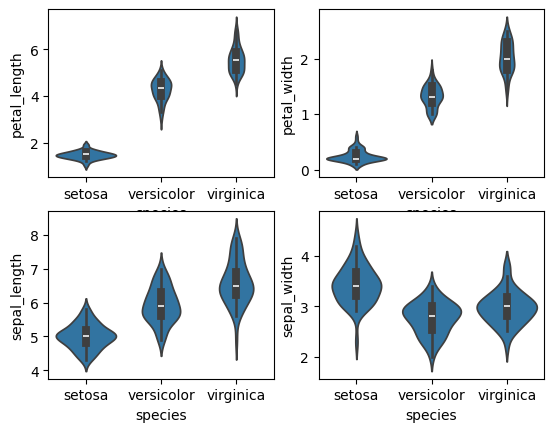

In [10]:
plt.figure(figsize=(16,16))
fig, axes = plt.subplots(2, 2)
sns.violinplot(x='species',y='petal_length', data=iris, ax=axes[0,0])
sns.violinplot(x='species',y='petal_width', data=iris, ax=axes[0,1])
sns.violinplot(x='species',y='sepal_length', data=iris, ax=axes[1,0])
sns.violinplot(x='species',y='sepal_width', data=iris, ax=axes[1,1])
plt.show()

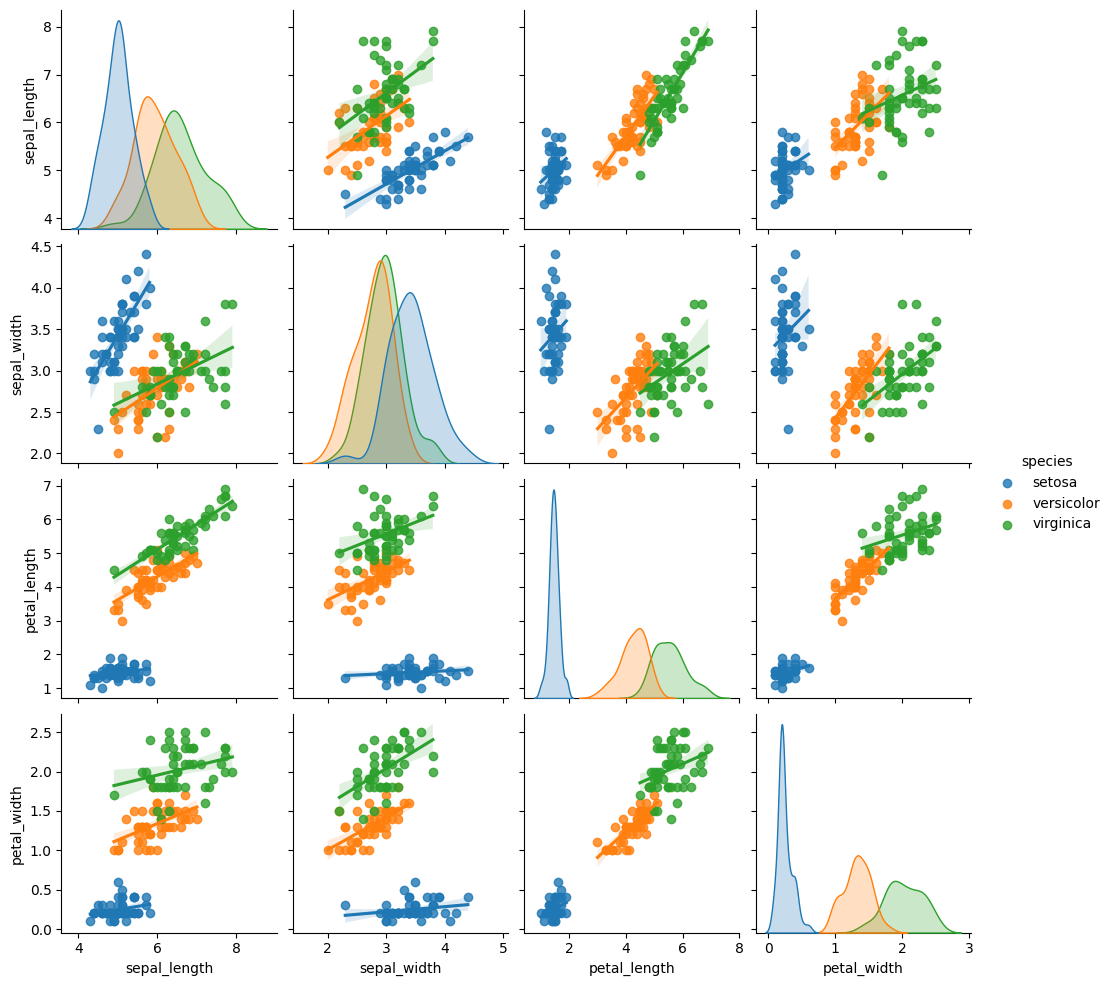

In [11]:
sns.pairplot(data=iris, kind='reg', diag_kind='kde', hue='species')

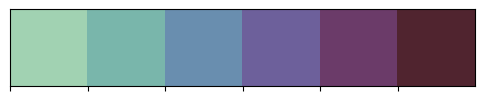

In [12]:
current_palette = sns.cubehelix_palette(start=0, light=0.75, dark=0.2)
sns.palplot(sns.color_palette(sns.cubehelix_palette(start=2,rot=8, light=0.75, dark=0.2))) 
plt.show()



In [13]:
sns.set_palette('colorblind')

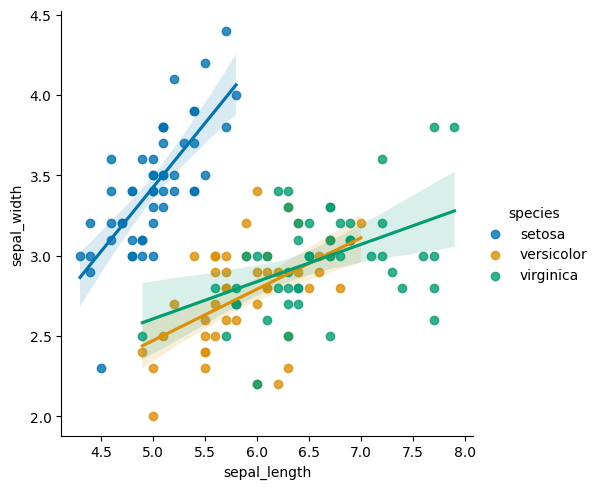

In [14]:
sns.lmplot(data=iris,
           x='sepal_length',
           y='sepal_width',
           hue='species')
plt.show()

In [15]:
transform = preprocessing.StandardScaler()
X=transform.fit_transform(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
X[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [16]:
Y = iris['species'].to_numpy()
type(Y)

numpy.ndarray

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2, test_size=0.2)

In [18]:
Y_test.shape

(30,)

In [19]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

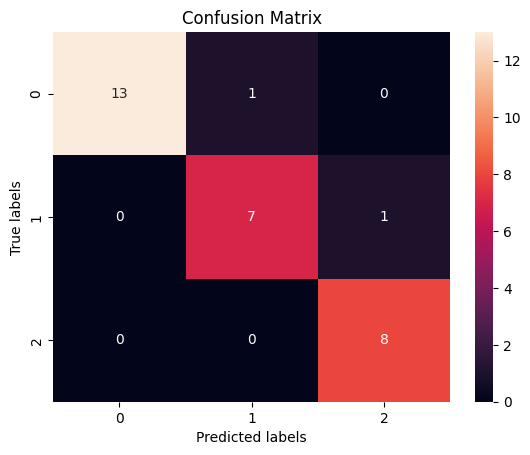

In [20]:
yhat=lr.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [21]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

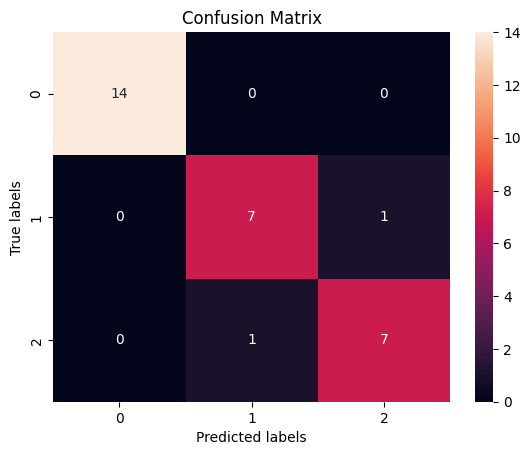

In [22]:
yhat=tree.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [23]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
y_score = KNN.predict_proba(X_test)[:, 1]


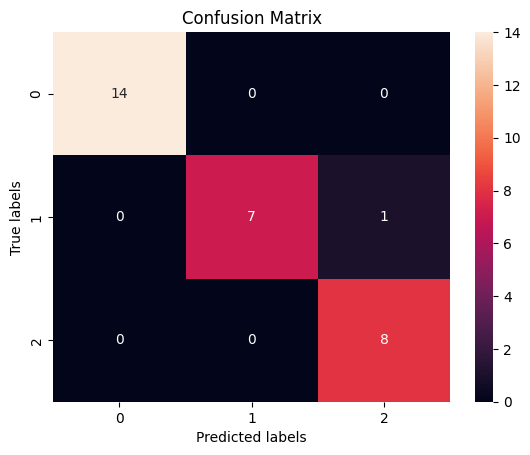

In [24]:
yhat=KNN.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [25]:
import plotly.express as px

fig = px.scatter(
    X_test, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=Y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()